# <font color = #4854E8> Binary Classification by Logistic Regression </font> 
![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

Content:
- Data Exploration
- Data Cleaning
- Data Visualization
- Model Building
- Model Evaluation

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Data Exploration </font>

### Import Libraries and DataSet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# view all columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter("ignore")

----
-----
Bảng dữ liệu này là một phần trong các bộ dữ liệu của LendingClub có sẵn trên Kaggle. Dưới đây là thông tin về bộ dữ liệu cụ thể này:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Các biến</th>
      <th>Mô tả</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>Số tiền được người vay đề nghị vay trong đơn xin vay. Nếu tại một thời điểm nào đó, bộ phận tín dụng giảm số tiền vay, thì giá trị này sẽ phản ánh số tiền vay mới.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>Số lần thanh toán trên khoản vay, được tính bằng tháng và có thể là 36 hoặc 60 tháng (kỳ hạn).</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Lãi suất của khoản vay</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>Số tiền hàng tháng mà người vay phải trả nếu khoản vay được giải ngân.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>Thứ hạng của khoản vay, được gán bởi LendingClub (LC), ví dụ: A, B, C....</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>Thứ hạng con (subgrade) của khoản vay, mô tả chi tiết hơn về thứ hạng (grade)</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>Chức vụ công việc mà người vay cung cấp khi nộp đơn vay.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Thời gian làm việc của người vay (đơn vị năm).</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>Tình trạng sở hữu nhà cửa, thông tin được cung cấp bởi người vay trong quá trình đăng ký hoặc được thu thập từ báo cáo tín dụng. Có các giá trị như RENT (thuê nhà), OWN (sở hữu nhà), MORTGAGE (đang trả nợ thế chấp), hoặc OTHER (khác).</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>Thu nhập hàng năm của người vay (người vay cung cấp trong quá trình đăng ký).</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Cho biết liệu thu nhập của người vay có được xác minh bởi LendingClub.</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>Tháng mà khoản vay được giải ngân</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Trạng thái hiện tại của khoản vay</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>Mục đích sử dụng khoản vay, được cung cấp bởi người vay trong đơn xin vay.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>Tiêu đề của khoản vay được cung cấp bởi người vay.</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>Ba số đầu của mã bưu chính được cung cấp bởi người vay trong đơn xin vay.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>Tiểu bang được cung cấp bởi người vay trong đơn xin vay.</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>Tỷ lệ nợ trên thu nhập hàng tháng của người vay, tính bằng cách chia tổng số tiền nợ hàng tháng (không bao gồm nợ thế chấp và khoản vay LC yêu cầu) cho thu nhập hàng tháng tự báo cáo của người vay.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>Tháng mà dòng tín dụng đầu tiên của người vay được mở.</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>Số lượng tài khoản tín dụng mà người vay đang có và trong trạng thái "mở".</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Số lượng bản ghi công khai về người vay có lịch sử tín dụng không tốt (có thể là do không tuân thủ hoặc vi phạm các cam kết tài chính, tín dụng). </td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Tổng số dư tín dụng quay vòng, cho biết mức độ nợ của người vay đối với các khoản tín dụng có hạn mức quay vòng, chẳng hạn như thẻ tín dụng. Số dư này có thể thay đổi theo thời gian tùy thuộc vào việc sử dụng và trả nợ.</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Tỷ lệ sử dụng hạn mức tín dụng quay vòng, hoặc số tiền mà người vay đang sử dụng so với tổng hạn mức tín dụng quay vòng có sẵn. Ví dụ, nếu bạn có hạn mức tín dụng quay vòng là 10.000 đô la và bạn đang nợ 2.000 đô la, thì tỷ lệ sử dụng hạn mức tín dụng quay vòng của bạn là 20% (2.000 / 10.000).</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>Tổng số lượng tài khoản tín dụng trong hồ sơ tín dụng của người vay</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>Tình trạng ban đầu của một khoản vay, có thể: "W" và "F"</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Cho biết liệu khoản vay là  cá nhân hay hai người đồng thời vay.</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Số lượng tài khoản thế chấp.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Số lượng thông tin công khai về phá sản trong hồ sơ của người vay.</td>
    </tr>
  </tbody>
</table>

---
----

In [2]:
df = pd.read_csv('./dataset/lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [4]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


### View data types 

In [5]:
df.select_dtypes(include=[object, bool]).head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"


In [6]:
df.select_dtypes(exclude=[object, bool]).head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0


## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Cleaning </font>

### Check null values

In [7]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [8]:
# Tính tỷ lệ % null mỗi cột 
null_columns = df.columns[df.isnull().any()].tolist()
null_percentage = (df[null_columns].isnull().sum() / len(df)) * 100
null_percentage


emp_title               5.789208
emp_length              4.621115
title                   0.443148
revol_util              0.069692
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
dtype: float64

In [9]:
# Xoá những dòng có missing value
df = df.dropna()
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

### Check duplicates

In [10]:
# Check Duplicates Data
df.duplicated().sum()

0

In [13]:
df.shape

(335868, 27)

### Preprocessing data
#### Handle categorical data

In [14]:
df.select_dtypes(include=[object, bool]).head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"


Encode the ordinal categorical variable 

In [15]:
df['label'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off':0})
df['term'] = df['term'].map({' 36 months':36,' 60 months':60})

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['encode_home_ownership'] = label_encoder.fit_transform(df['home_ownership'])
df['encode_grade'] = label_encoder.fit_transform(df['grade'])

#### Convert emp_length to numeric  

In [17]:
import re
df['emp_length'] = df['emp_length'].str.replace(r'[^0-9]+', '', regex=True)
df['emp_length'] = df['emp_length'].replace(r'^\s*$', '0', regex=True)
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce')

In [18]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,label,encode_home_ownership,encode_grade
0,10000.0,36,11.44,329.48,B,B4,Marketing,10,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,5,1
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,4,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,1,1
2,15600.0,36,10.49,506.97,B,B3,Statistician,1,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,5,1
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,6,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,5,0
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,9,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,1,2


## <font color = #950CDF> Part 3: </font> <font color = #4854E8> Data Visualization </font>

In [16]:
df['loan_status'].value_counts(normalize=True).mul(100).reset_index()

,index,loan_status
0,Fully Paid,80.256529
1,Charged Off,19.743471


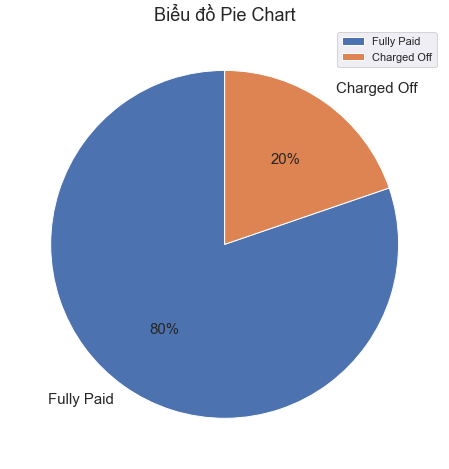

In [19]:
sns.set_theme()
plt.figure(figsize=(8,8))
x = df['loan_status'].value_counts(normalize=True).mul(100).reset_index()
plt.pie(x['loan_status'], labels=x['index'], autopct='%.0f%%', textprops={'fontsize': 15},startangle=90)
plt.legend()
plt.title('Biểu đồ Pie Chart', fontsize=18)
plt.show()

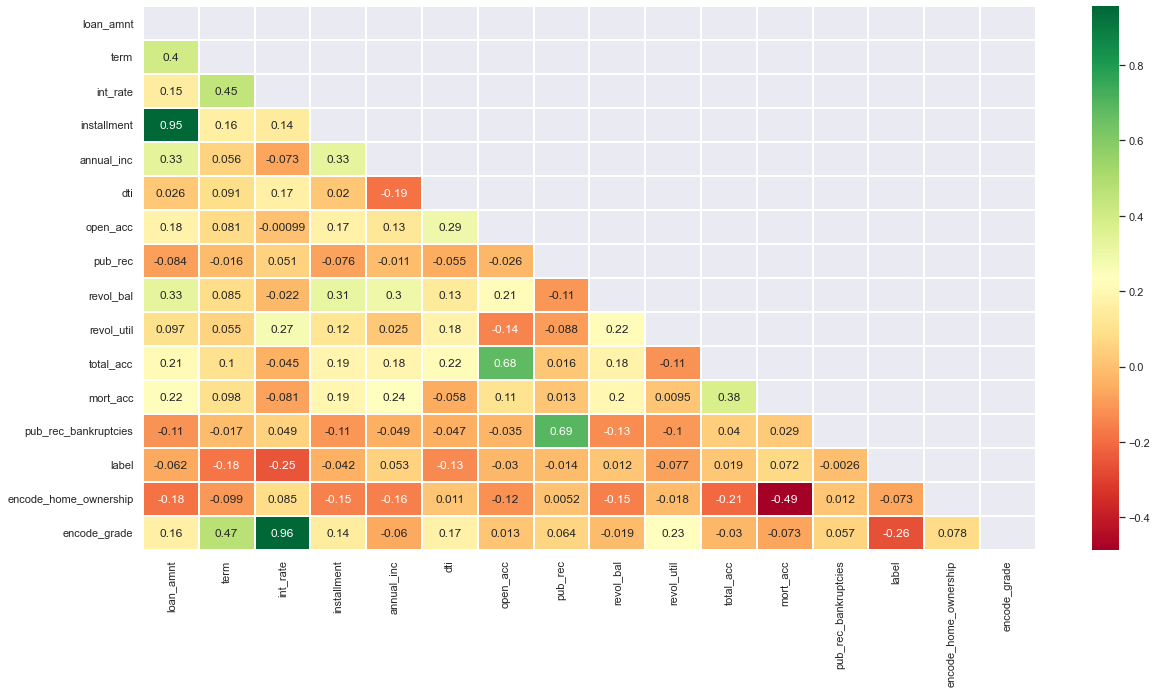

In [20]:
plt.figure(figsize = (20, 10))
matrix = np.triu(df.corr())        
sns.heatmap(df.corr(), mask = matrix, annot = True, cmap="RdYlGn", linewidth = 1.5)
plt.show()

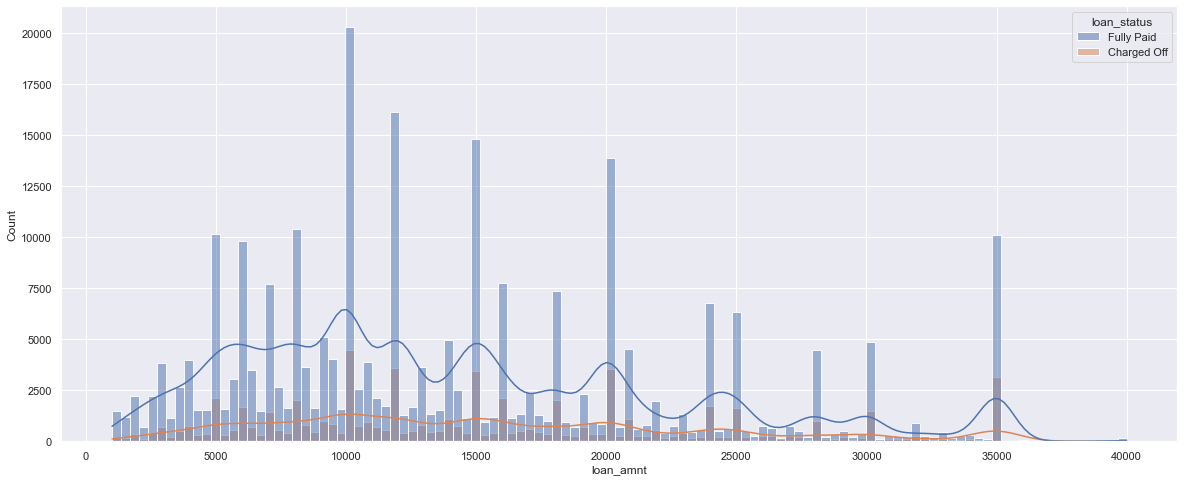

In [21]:
plt.figure(figsize=(20,8))
sns.histplot(data=df, x="loan_amnt", kde=True, hue="loan_status")
plt.show()

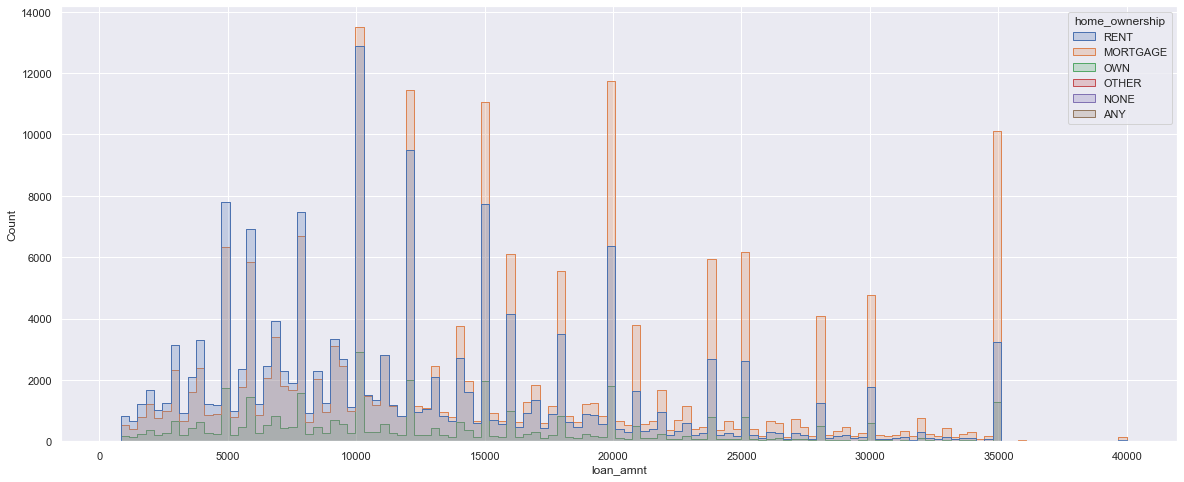

In [10]:
plt.figure(figsize=(20,8))
sns.histplot(data=df, x="loan_amnt", hue="home_ownership",element="step")
plt.show()

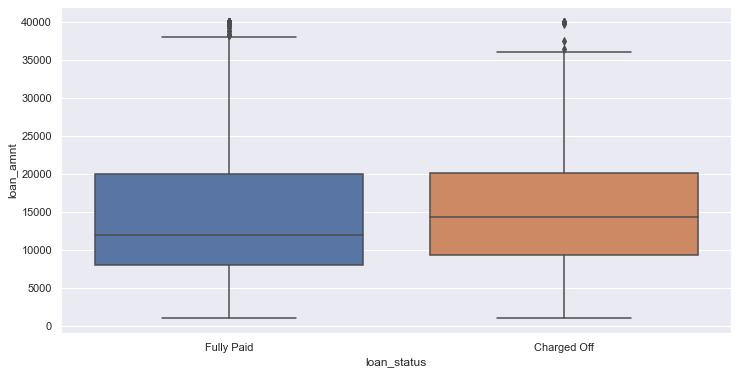

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='loan_status',y='loan_amnt')
plt.show()

In [101]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,66312.0,15577.620943,8480.056046,1000.0,9375.0,14400.0,20125.0,40000.0
Fully Paid,269556.0,14263.244001,8343.040335,1000.0,8000.0,12000.0,20000.0,40000.0


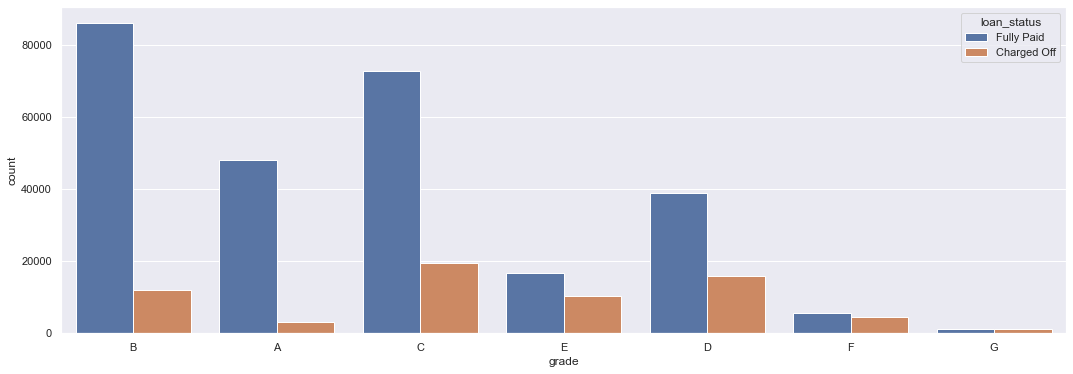

In [24]:
plt.figure(figsize=(18,6))
sns.countplot(data=df, x='grade', hue='loan_status')
plt.show()

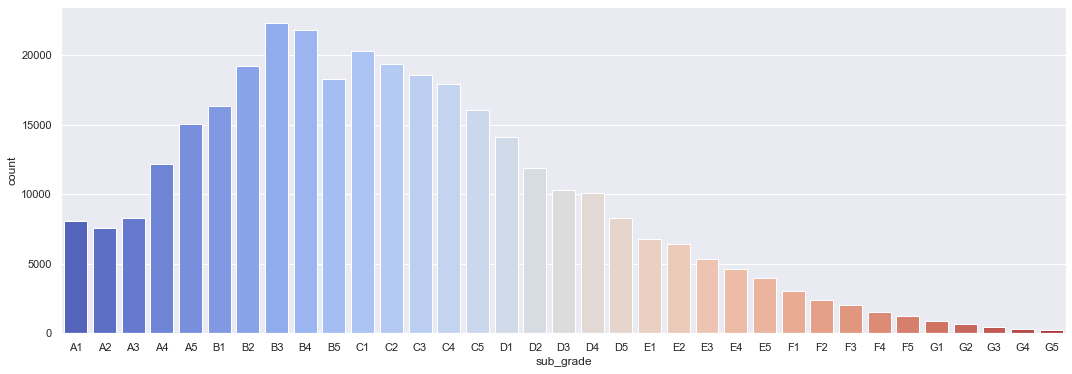

In [25]:
plt.figure(figsize=(18,6))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )
plt.show()

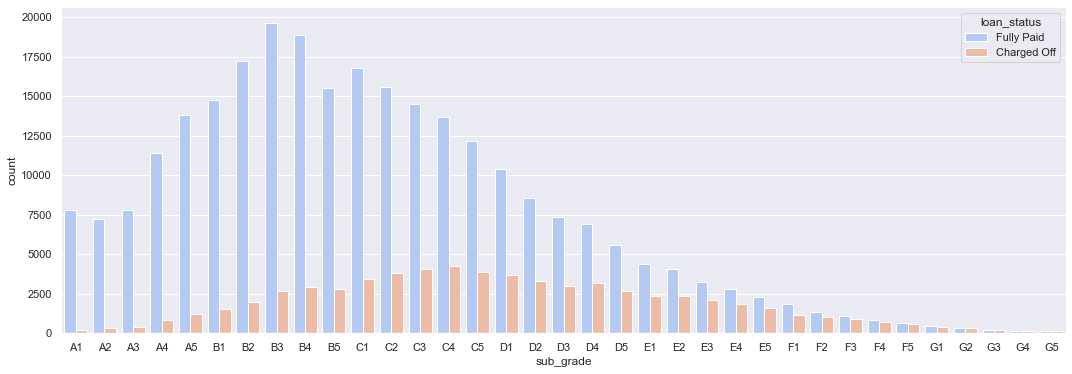

In [26]:
plt.figure(figsize=(18,6))
sns.countplot(data=df,x='sub_grade',palette='coolwarm',
              order=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5',
                      'C1','C2','C3','C4','C5','D1','D2','D3','D4','D5',
                      'E1','E2','E3','E4','E5','F1','F2','F3','F4','F5',
                      'G1','G2','G3','G4','G5'],
              hue='loan_status')
plt.show()

In [34]:
x = df.groupby(['grade'])['loan_status'].value_counts().unstack().reset_index()
x

loan_status,grade,Charged Off,Fully Paid
0,A,3050,48073
1,B,11959,86049
2,C,19443,72770
3,D,15848,38792
4,E,10328,16795
5,F,4420,5748
6,G,1264,1329


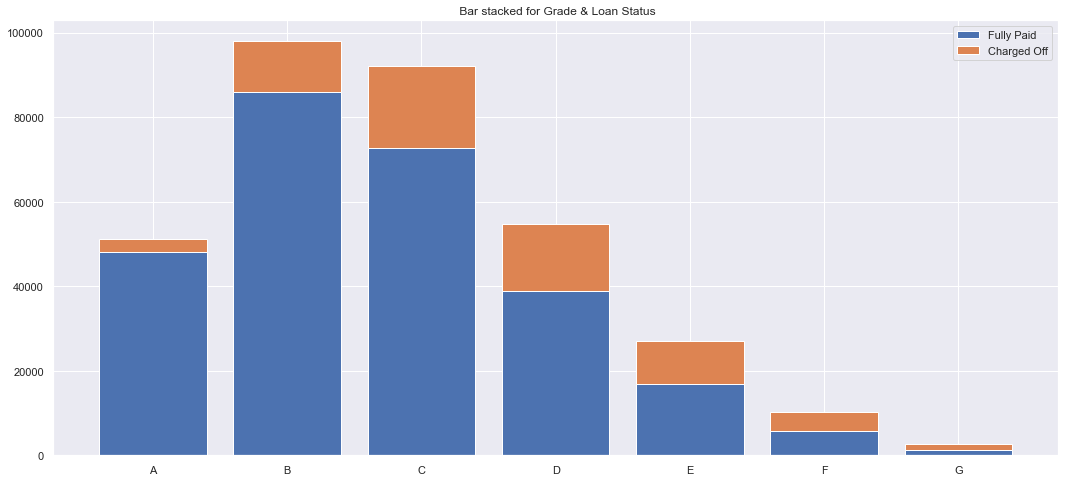

In [35]:
def plot_stacked_bar(x):
    plt.figure(figsize=(18, 8))
    
    plt.bar(x['grade'], x['Fully Paid'], label='Fully Paid')
    plt.bar(x['grade'], x['Charged Off'], label='Charged Off', bottom=x['Fully Paid'])
    plt.legend()

    # Đặt tiêu đề cho biểu đồ
    plt.title(' Bar stacked for Grade & Loan Status')
    plt.show()

# dữ liệu x
plot_stacked_bar(x)

In [102]:
result = df.groupby('grade')['loan_status'].value_counts().to_frame().rename(columns={'loan_status': 'count'}).reset_index()
# Chuyển thành bảng pivot
pivot_table = result.pivot(index='loan_status', columns='grade', values='count').fillna(0).astype(int)
pivot_table

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,3050,11959,19443,15848,10328,4420,1264
Fully Paid,48073,86049,72770,38792,16795,5748,1329


In [103]:
# Tính phần trăm của mỗi giá trị 'loan_status' cho từng nhóm 'grade'
result_percentage = df.groupby('grade')['loan_status'].value_counts(normalize=True).mul(100).reset_index(name='percentage')
# Chuyển thành bảng pivot
pivot_table_percentage = result_percentage.pivot(index='loan_status', columns='grade', values='percentage').fillna(0).astype(float)
pivot_table_percentage

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,5.966004,12.202065,21.08488,29.004392,38.078384,43.469709,48.746626
Fully Paid,94.033996,87.797935,78.91512,70.995608,61.921616,56.530291,51.253374


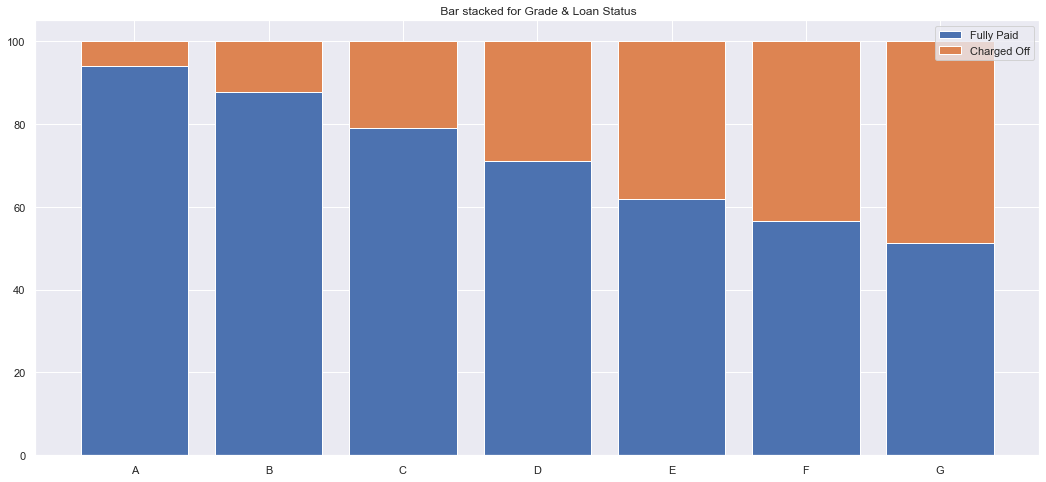

In [38]:
a = result_percentage.pivot(index='grade', columns='loan_status', values='percentage').fillna(0).astype(float).reset_index()
# Gọi hàm với dữ liệu a
plot_stacked_bar(a)

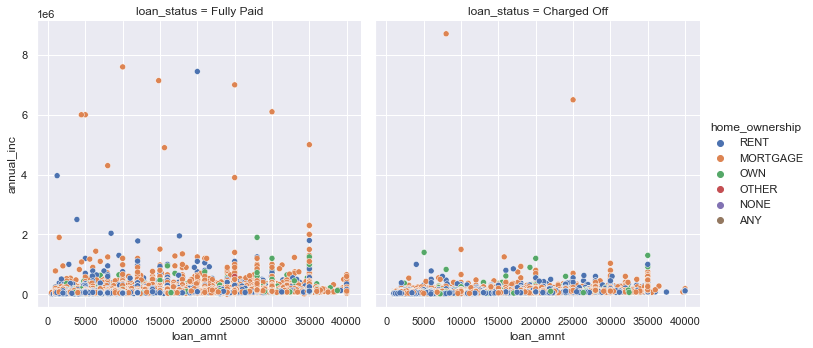

In [23]:
sns.relplot(data=df, x="loan_amnt", y="annual_inc", hue="home_ownership", col="loan_status")

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Model Building </font>


## <font color = #950CDF>  4.1: </font> <font color = #4854E8> Feature Engineering </font>

In [33]:
feature = df.select_dtypes(exclude=[object, bool]).drop(columns=['label'])
feature.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,encode_home_ownership,encode_grade
0,10000.0,36,11.44,329.48,10,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,5,1
1,8000.0,36,11.99,265.68,4,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1,1
2,15600.0,36,10.49,506.97,1,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,5,1
3,7200.0,36,6.49,220.65,6,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,5,0
4,24375.0,60,17.27,609.33,9,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,1,2


Chia biến X và y

In [60]:
X = feature.to_numpy().astype(np.float64)
y = df['label'].to_numpy().astype(np.float64)
X.shape, y.shape

((335868, 16), (335868,))

In [61]:
n_samples = X.shape[0]
X_b= np.hstack([np.ones((n_samples, 1)), X])
X_b.shape

(335868, 17)

In [62]:
X_b.shape, y.shape

((335868, 17), (335868,))

In [63]:
def logistic_function(x):
  return 1/ (1 + np.exp(-x))

def predict(x, theta):
  z = np.dot(x , theta)
  y_pred = logistic_function(z)
  return y_pred

def compute_cost(y_pred, y):
  m = len(y)
  epsilon = 1e-15  # Small epsilon to avoid log(0)
  y_pred = np.maximum(epsilon, np.minimum(1 - epsilon, y_pred))
  error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
  cost = -1 / m * sum(error)
  return cost

def compute_gradient(x, y, y_pred):
  m = len(y)
  gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
  return gradient

def update_weight(theta, lr, gradient):
  new_theta = theta - lr*gradient
  return new_theta

## <font color = #950CDF>  4.2: </font> <font color = #4854E8> Split Train & Test </font>

In [65]:
# split train test
from sklearn.model_selection import train_test_split
random_state = 2
is_shuffle = True
X_train , X_test , y_train , y_test = train_test_split(X_b , y ,
                                                     test_size = 0.2 ,
                                                     random_state = random_state ,
                                                     shuffle = is_shuffle)
# Normalization 
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:]) # không chuẩn hóa trên bias 
X_test[:,1:] = normalizer.transform(X_test[:,1:])

In [66]:
n_features = X_train.shape[1]
theta = np.random.rand(n_features)
theta, n_samples, n_features

(array([0.83457627, 0.92112989, 0.91865731, 0.19815174, 0.9737575 ,
        0.90000895, 0.67361545, 0.21977315, 0.73324581, 0.20782542,
        0.60661884, 0.68784127, 0.66004163, 0.98507561, 0.59687365,
        0.06017707, 0.47929948]),
 335868,
 17)

## <font color = #950CDF>  4.3: </font> <font color = #4854E8> Train model </font>

In [67]:
# parameters

n_epochs = 1000
lr = 0.01

losses = []
for epoch in range(n_epochs):
  # get all the samples
  x = X_train
  y = y_train

  # predict y_hat
  y_pred = predict(x, theta)

  # compute loss
  loss = compute_cost(y_pred, y)
  losses.append(loss)

  # compute gradient
  gradient = compute_gradient(x, y, y_pred)

  # update weights
  theta = update_weight(theta, lr, gradient)

theta, losses

(array([ 1.54796759, -0.15304612, -0.05343292, -0.41024702,  0.04197212,
         0.16795655,  0.22983562, -0.20838008,  0.07612754, -0.09025186,
         0.06139172,  0.10652541, -0.05123499,  0.33273163,  0.21510344,
         0.20032863, -0.19847068]),
 [1.7945451776130195,
  1.7887801369837033,
  1.7830254473542237,
  1.7772811681153953,
  1.771547350796924,
  1.7658240148616875,
  1.7601112252041122,
  1.7544090016040081,
  1.748717398235568,
  1.743036447219191,
  1.7373662015836773,
  1.7317067021018624,
  1.7260579844124522,
  1.720420091606495,
  1.7147930730953984,
  1.7091769583432816,
  1.7035718034659755,
  1.697977639345994,
  1.6923945152637931,
  1.6868224735478536,
  1.6812615528734647,
  1.6757117961915358,
  1.6701732472614939,
  1.6646459494145263,
  1.659129946287415,
  1.6536252769401951,
  1.6481319886512218,
  1.642650118354412,
  1.6371797129890948,
  1.6317208131541532,
  1.6262734652226056,
  1.62083770768474,
  1.6154135866447428,
  1.6100011434044643,
  1.60

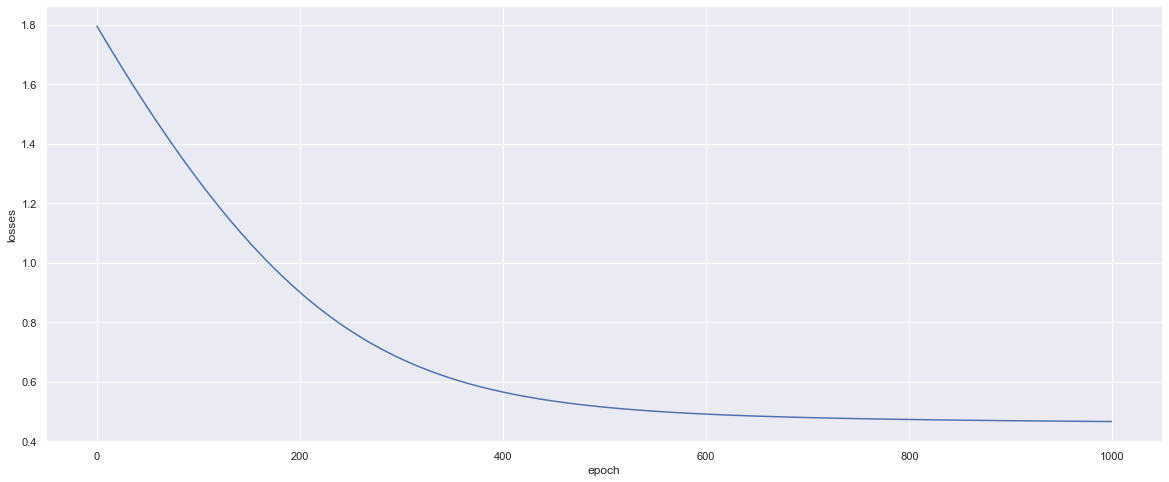

In [68]:
plt.figure(figsize=(20, 8))
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('losses')
plt.show()

In [75]:
Y_preds = predict(X_test, theta)
Y_preds[:20]

array([0.93675593, 0.83584808, 0.72538154, 0.9386079 , 0.54245705,
       0.71215144, 0.68538395, 0.71790906, 0.72637252, 0.94331137,
       0.70348874, 0.82253624, 0.87760008, 0.82390277, 0.78803954,
       0.74542076, 0.821475  , 0.85509544, 0.76045959, 0.84262573])

In [76]:
thresholds = [0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
Y_preds = predict(X_test, theta)
accs = []
y = y_test
for threshold in thresholds:
  Y_pred_ths = []
  for y_pred in Y_preds:
    if y_pred >= threshold:
      Y_pred_ths.append(1) # nếu thỏa dk if thì dự đoán class là 1 --> append(1)
    else:
      Y_pred_ths.append(0) # ngược lại, dự đoán class =0

  Y_pred_ths = np.array(Y_pred_ths)
  acc = sum(y == Y_pred_ths)/len(y) # Tổng số cái đúng/ Tổng số cái dự đoán 
  accs.append(acc)
# accs
for a, b in zip(thresholds, accs):
  print(f'thresholds: {a}, acc: {b}')

thresholds: 0.45, acc: 0.8018578616726709
thresholds: 0.5, acc: 0.7999077023848513
thresholds: 0.55, acc: 0.7969154732485784
thresholds: 0.6, acc: 0.7896656444457677
thresholds: 0.65, acc: 0.775195760264388
thresholds: 0.7, acc: 0.7508262125227022
thresholds: 0.75, acc: 0.7089945514633638
thresholds: 0.8, acc: 0.6379998213594545


## <font color = #950CDF> Part 5: </font> <font color = #4854E8> Model Evaluation </font>

In [90]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
Y_preds = predict(X_test, theta)
y_hat = Y_preds.round()

# Tính toán các metric
acc = (y_hat == y_test).mean()
precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)

result_from_scratch = pd.DataFrame({'accuracy': [acc],
                            'precision': [precision],
                            'recall': [recall],
                            'f1-score': [f1]})
result_from_scratch


,accuracy,precision,recall,f1-score
0,0.799908,0.813624,0.973956,0.8866


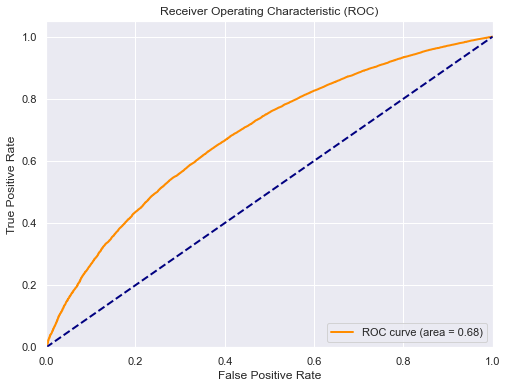

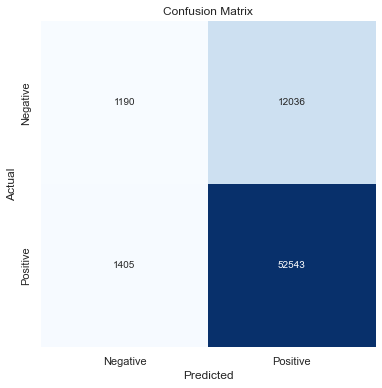

In [89]:
#  vẽ ROC curve và tính AUC
def plot_roc_curve(X, y, theta):
    y_prob = predict(X, theta)
    fpr, tpr, thresholds = roc_curve(y, y_prob)
    auc_value = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_value))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

#confusion matrix
def plot_confusion_matrix(X, y, theta):
    y_pred = predict(X, theta).round()
    cm = confusion_matrix(y, y_pred)
    class_names = ['Negative', 'Positive']

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

#  ROC curve và  AUC
plot_roc_curve(X_test, y_test, theta)
#  confusion matrix
plot_confusion_matrix(X_test, y_test, theta)

## <font color = #27C3E5> Part 6: </font> <font color = #41EA46> Implementation with Scikit-Learn </font>

In [91]:
X = feature.to_numpy().astype(np.float64)
y = df['label'].to_numpy().astype(np.float64)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train) 
X_test = normalizer.transform(X_test)

In [92]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [93]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [94]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
# Dự đoán trên dữ liệu test
# y_pred = model.predict(X_test)
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

y_predict_logreg_model = log_reg_model.predict(X_test)
y_predict_decision_tree = decision_tree_model.predict(X_test)
y_predict_random_forest = random_forest_model.predict(X_test)

# Tính toán các metric từng model
metrics = []
metrics.append(('Logistic Regression', y_predict_logreg_model))
metrics.append(('Decision Tree', y_predict_decision_tree))
metrics.append(('Random Forest', y_predict_random_forest))

results = []
for model_name, y_pred in metrics:
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    specificity = specificity_score(y_test, y_pred)
    
    result = {
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Specificity': specificity,  
        'Accuracy': accuracy
    }
    results.append(result)

df_results = pd.DataFrame(results)
df_results


,Model,Precision,Recall,F1-score,Specificity,Accuracy
0,Logistic Regression,0.814561,0.980302,0.889779,0.089814,0.804954
1,Decision Tree,0.824426,0.802583,0.813358,0.302908,0.704191
2,Random Forest,0.815229,0.976421,0.888574,0.097425,0.803337


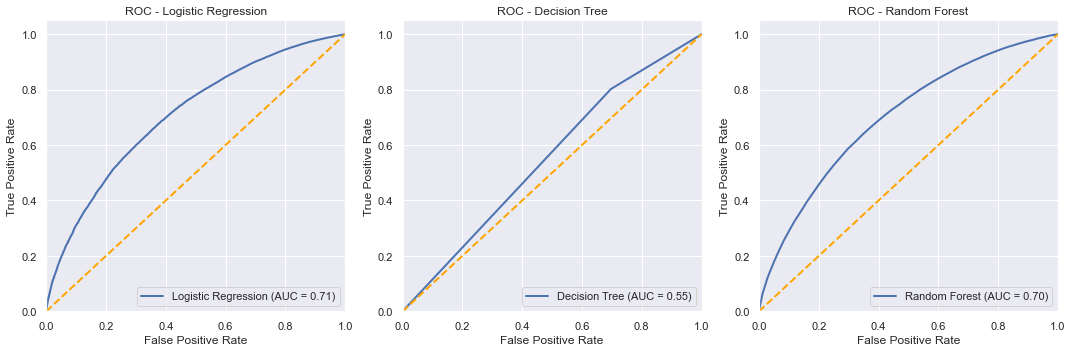

In [96]:
from sklearn.metrics import roc_curve, auc, accuracy_score
models = [log_reg_model, decision_tree_model, random_forest_model]
model_labels = ['Logistic Regression', 'Decision Tree', 'Random Forest']

n_subplots = len(models)
fig, axes = plt.subplots(1, n_subplots, figsize=(15, 5))

for i, (model, label) in enumerate(zip(models, model_labels)):
  
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_value = auc(fpr, tpr)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    ax = axes[i]
    ax.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {auc_value:.2f})')
    ax.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC - {label}')
    ax.legend(loc="lower right")

plt.tight_layout()
plt.show()


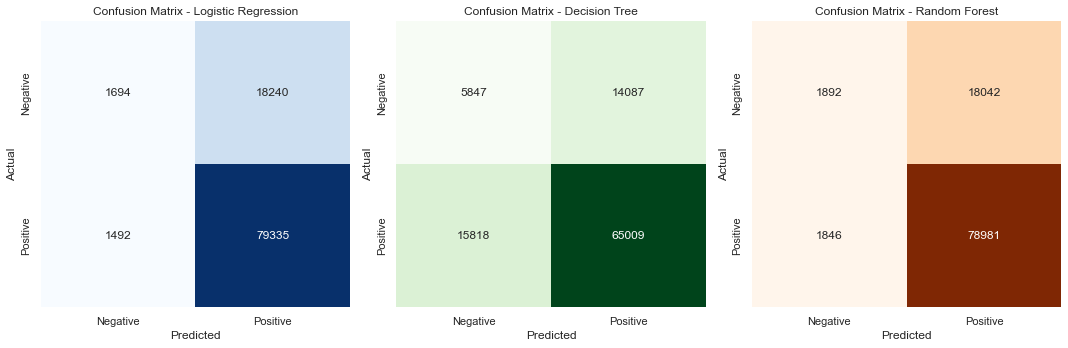

In [186]:
models = [log_reg_model, decision_tree_model, random_forest_model]
model_labels = ['Logistic Regression', 'Decision Tree', 'Random Forest']

n_subplots = len(models)
fig, axes = plt.subplots(1, n_subplots, figsize=(15, 5))
colors = ["Blues", "Greens", "Oranges"]

for i, (model, label) in enumerate(zip(models, model_labels)):

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    class_names = ['Negative', 'Positive']

    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt="d", cmap=colors[i], cbar=False, xticklabels=class_names, yticklabels=class_names, ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(f'Confusion Matrix - {label}')

plt.tight_layout()
plt.show()
